In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MDS project/df_gpt4.csv')

df = df.dropna(subset=['cleaned text'])

df


,Institution name,Main panel_x,Unit of assessment number_x,Unit of assessment name,Title,Summary impact type,Countries,Formal partners,Funding programmes,Global research identifiers,...,1. Summary of the impact,2. Underpinning research,3. References to the research,4. Details of the impact,5. Sources to corroborate the impact,Weighted Avg,Variance,5 Class Labels,9 Class Labels,cleaned text
0,University of East London,C,21.0,Sociology,"?Go Home?; Shaping the practice, policy and un...",Societal,[Italy];[Sweden];[Netherlands ];[Ireland];[Uni...,[University of Eastern Finland];[Middle East T...,[European Commission under the 7th Framework P...,NaN,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,2.667,0.556111,3,5,"Since 2013, CMRB findings have been used to su..."
1,University of Lincoln,A,6.0,"Agriculture, Food and Veterinary Sciences",Agricultural Robotics: Data Driven Technologie...,Technological,[England];[Norway];[USA],[SAGA Robotics];[Garford Farms Limited];[Berry...,[N/A],[grid.423443.6];[grid.418100.c],...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.000,0.666000,3,6,UoL’s innovative agri-food research has underp...
2,University of Cambridge,A,4.0,"Psychology, Psychiatry and Neuroscience",Alleviating the societal and economic burden o...,Health,[England];[China];[USA];[Canada];[Belgium];[Fr...,NaN,NaN,[grid.14105.31];[grid.473755.7];[grid.52788.30],...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research \(indicative maximu...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.667,0.444111,4,7,The Cambridge University research has had a si...
3,University of Cambridge,A,6.0,"Agriculture, Food and Veterinary Sciences",Changes in policy for the control of bovine tu...,Environmental,[England];[Wales];[Ethiopia],NaN,NaN,[grid.418100.c];[grid.434257.3];[grid.433527.4...,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.500,0.450000,4,7,Bovine tuberculosis is a substantial economic ...
4,University of Derby,C,20.0,Social Work and Social Policy,Changing Police and Investigative Practice thr...,Legal,NaN,NaN,NaN,NaN,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,2.333,1.554111,2,5,The impact of Bull's work is on: (1) internati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,School of Oriental and African Studies,C,22.0,Anthropology and Development Studies,Transforming Working Practices in the House of...,Societal,"[UK, Europe, Asia, Africa]",[Hansard Society];[Leeds University];[Jawaharl...,[ERC-2018-ADG - ERC Advanced Grant];[Research ...,[grid.452896.4];[grid.452966.a];[grid.426413.6...,...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research** \(indicative maxi...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.750,0.187500,4,8,"Many scholars, MPs, civil servants and Commons..."
6300,Nottingham Trent University,A,3.0,"Allied Health Professions, Dentistry, Nursing ...",Translating biomedical nanotechnology into com...,Technological,"[Algeria,

In [ ]:
import pandas as pd
import tensorflow
from nltk.tokenize import regexp_tokenize, sent_tokenize
from nltk import pos_tag_sents
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import re
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


#Dictionary of contractions for replacement

contractions = {
          "ain't": "am not",
          "aren't": "are not",
          "can't": "cannot",
          "can't've": "cannot have",
          "'cause": "because",
          "could've": "could have",
          "couldn't": "could not",
          "couldn't've": "could not have",
          "didn't": "did not",
          "doesn't": "does not",
          "don't": "do not",
          "hadn't": "had not",
          "hadn't've": "had not have",
          "hasn't": "has not",
          "haven't": "have not",
          "he'd": "he would",
          "he'd've": "he would have",
          "he'll": "he will",
          "he'll've": "he will have",
          "he's": "he is",
          "how'd": "how did",
          "how'd'y": "how do you",
          "how'll": "how will",
          "how's": "how is",
          "i'd": "i would",
          "i'd've": "i would have",
          "i'll": "i will",
          "i'll've": "i will have",
          "i'm": "i am",
          "i've": "i have",
          "isn't": "is not",
          "it'd": "it had",
          "it'd've": "it would have",
          "it'll": "it will",
          "it'll've": "it will have",
          "it's": "it is",
          "let's": "let us",
          "ma'am": "madam",
          "mayn't": "may not",
          "might've": "might have",
          "mightn't": "might not",
          "mightn't've": "might not have",
          "must've": "must have",
          "mustn't": "must not",
          "mustn't've": "must not have",
          "needn't": "need not",
          "needn't've": "need not have",
          "o'clock": "of the clock",
          "oughtn't": "ought not",
          "oughtn't've": "ought not have",
          "shan't": "shall not",
          "sha'n't": "shall not",
          "shan't've": "shall not have",
          "she'd": "she would",
          "she'd've": "she would have",
          "she'll": "she will",
          "she'll've": "she will have",
          "she's": "she is",
          "should've": "should have",
          "shouldn't": "should not",
          "shouldn't've": "should not have",
          "so've": "so have",
          "so's": "so is",
          "that'd": "that would",
          "that'd've": "that would have",
          "that's": "that is",
          "there'd": "there had",
          "there'd've": "there would have",
          "there's": "there is",
          "they'd": "they would",
          "they'd've": "they would have",
          "they'll": "they will",
          "they'll've": "they will have",
          "they're": "they are",
          "they've": "they have",
          "to've": "to have",
          "wasn't": "was not",
          "we'd": "we had",
          "we'd've": "we would have",
          "we'll": "we will",
          "we'll've": "we will have",
          "we're": "we are",
          "we've": "we have",
          "weren't": "were not",
          "what'll": "what will",
          "what'll've": "what will have",
          "what're": "what are",
          "what's": "what is",
          "what've": "what have",
          "when's": "when is",
          "when've": "when have",
          "where'd": "where did",
          "where's": "where is",
          "where've": "where have",
          "who'll": "who will",
          "who'll've": "who will have",
          "who's": "who is",
          "who've": "who have",
          "why's": "why is",
          "why've": "why have",
          "will've": "will have",
          "won't": "will not",
          "won't've": "will not have",
          "would've": "would have",
          "wouldn't": "would not",
          "wouldn't've": "would not have",
          "y'all": "you all",
          "y'alls": "you alls",
          "y'all'd": "you all would",
          "y'all'd've": "you all would have",
          "y'all're": "you all are",
          "y'all've": "you all have",
          "you'd": "you had",
          "you'd've": "you would have",
          "you'll": "you you will",
          "you'll've": "you you will have",
          "you're": "you are",
          "you've": "you have"
            }

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)


def penn_to_wordnet(penn_pos_tag):
    """
    Function to convert Penn Treebank part-of-speech tags to corresponding WordNet tags.
    """
    tag_dictionary = {
        'NN': 'n', 'NNS': 'n', 'NNP': 'n', 'NNPS': 'n',
        'JJ': 'a', 'JJR': 'a', 'JJS': 'a',
        'VB': 'v', 'VBD': 'v', 'VBG': 'v', 'VBN': 'v', 'VBP': 'v', 'VBZ': 'v',
        'RB': 'r', 'RBR': 'r', 'RBS': 'r',
        'MD': 'v'
    }

    # Return the WordNet tag for given Penn Treebank tag, return "n" if none found
    return tag_dictionary.get(penn_pos_tag[:2], "n")

def preprocess_text(text):
    """
    Function to preprocess text: lowercasing, removing punctuation, expanding contractions, lemmatization, etc.
    """
    # Account for edge case when text is empty
    if not isinstance(text, str):
        return ""

    # Convert all text to lowercase
    text = text.lower()

    # Remove characters that are repeated more than twice in a row
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Replace URLs with space
    text = re.sub(r"http\S+", " ", text)

    # Remove HTML tags from text
    text = re.sub("<.*?>", "", text)

    # Ensure that there is space after each period
    text = re.sub(r'\.(?![ .])', '. ', text)

    # Replace line break tags with space
    text = re.sub(r'<br />', ' ', text)

    # Remove words containing digits
    text = re.sub(r'\d+', '', text)

    # Remove all numbers
    text = re.sub(r'\b(?=.*\d)(?=.*[a-zA-Z]).*?\b', '', text)

    # Remove all numbers including floating points
    text = re.sub(r'\b\d+(\.\d+)?', '', text)

    # Tokenize sentences and words
    tokenized_sentences = [regexp_tokenize(sent, pattern="\s+", gaps=True) for sent in sent_tokenize(text)]

    new_sentences = []

    # Use tqdm to visualize the progress of processing sentences
    for sentences in pos_tag_sents(tokenized_sentences):
        new_sentence = []
        # Iterate through word/tag pair
        for word, tag in sentences:
            # Check if word in punctuation and stopwords list
            if word not in punctuation_set and word not in stopwords_set:
                # Expand contractions if present
                if word in contractions:
                    words = contractions[word].split(" ")
                    new_sentence.extend(words)
                else:
                    # Get WordNet Pos Tag and lemmatize word
                    wordnet_pos = penn_to_wordnet(tag)
                    lemmatized_word = wnl.lemmatize(word, pos=wordnet_pos)
                    # Remove non-alphanumeric characters
                    lemmatized_word = re.sub(r'[^\w\s]', '', lemmatized_word)

                    # Check if lemmatized word exists and has length greater than 2
                    if lemmatized_word and len(lemmatized_word) > 2:
                        new_sentence.append(lemmatized_word)

        if new_sentence:
            new_sentences.append(new_sentence)

    return new_sentences

In [ ]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

new_df = df[["Main panel_x","Unit of assessment number_x","Title","cleaned text","5 Class Labels","Summary impact type","9 Class Labels", "Variance", "Weighted Avg"]]

new_df = new_df[new_df["Main panel_x"] == "A"]

new_df["sentence tokenized"] = new_df["cleaned text"].progress_apply(lambda x: preprocess_text(x))

100%|██████████| 1350/1350 [01:47<00:00, 12.54it/s]


In [ ]:

def map_labels(label):
    if label in [0, 1, 2, 3, 4, 5]:
        return 0
    elif label in [6, 7]:
        return 1
    elif label == 8:
        return 2
    else:
        return label

new_df['3 Class Labels'] = new_df['9 Class Labels'].apply(map_labels)


In [ ]:
def flatten(sents_tokenized):
    return [word for sentence in sents_tokenized for word in sentence]

def tokens_to_string(tokens):
    return ' '.join(tokens)


new_df["word tokenized"] = new_df["sentence tokenized"].apply(lambda x: flatten(x))

new_df["string"] = new_df["word tokenized"].apply(lambda x: tokens_to_string(x))

In [ ]:
pip install sentence_transformers

In [ ]:
import multiprocessing
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
import torch

tqdm.pandas()

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the model and move it to the specified device
model = SentenceTransformer('paraphrase-MiniLM-L6-v2', device=device)


def get_lexical_cohesion_sentence(text):
    text = sent_tokenize(text)
    embeddings = model.encode(text)
    similarity_matrix = cosine_similarity(embeddings)
    adjacent_similarities = np.diag(similarity_matrix, k=1)
    mean_similarity = adjacent_similarities.mean()
    std_dev_similarity = adjacent_similarities.std()
    mean_similarity_all_pairs = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])
    std_dev_similarity_all_pairs = np.std(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])

    return {
        "mean_similarity_adjacent": mean_similarity,
        "std_dev_similarity_adjacent": std_dev_similarity,
        "mean_similarity_all_pairs": mean_similarity_all_pairs,
        "std_dev_similarity_all_pairs": std_dev_similarity_all_pairs,
    }

def get_lexical_cohesion_paragraphs(text):
    paragraphs = text.split('\n\n')
    embeddings = model.encode(paragraphs)
    similarity_matrix = cosine_similarity(embeddings)
    adjacent_similarities = np.diag(similarity_matrix, k=1)
    mean_similarity_adjacent = adjacent_similarities.mean()
    std_dev_similarity_adjacent = adjacent_similarities.std()
    upper_triangle_indices = np.triu_indices_from(similarity_matrix, k=1)
    mean_similarity_all_pairs = np.mean(similarity_matrix[upper_triangle_indices])
    std_dev_similarity_all_pairs = np.std(similarity_matrix[upper_triangle_indices])

    return {
        "mean_similarity_adjacent": mean_similarity_adjacent,
        "std_dev_similarity_adjacent": std_dev_similarity_adjacent,
        "mean_similarity_all_pairs": mean_similarity_all_pairs,
        "std_dev_similarity_all_pairs": std_dev_similarity_all_pairs,
    }



def batch_apply(df, func, batch_size=10):
    results = []
    batches = [df.iloc[i:i + batch_size] for i in range(0, len(df), batch_size)]

    for batch in tqdm(batches):
        batch_results = batch['cleaned text'].apply(func)
        results.append(batch_results)

    return pd.concat(results, ignore_index=True)

sentence_cohesion_df = batch_apply(new_df, lambda text: get_lexical_cohesion_sentence(text), batch_size=10)
paragraph_cohesion_df = batch_apply(new_df, lambda text: get_lexical_cohesion_paragraphs(text), batch_size=10)

sentence_cohesion_df

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 135/135 [00:16<00:00,  8.20it/s]


,cleaned text
0,"{'mean_similarity_adjacent': 0.4611143, 'std_d..."
1,"{'mean_similarity_adjacent': 0.48415503, 'std_..."
2,"{'mean_similarity_adjacent': 0.4216755, 'std_d..."
3,"{'mean_similarity_adjacent': 0.39620596, 'std_..."
4,"{'mean_similarity_adjacent': 0.501782, 'std_de..."
...,...
1345,"{'mean_similarity_adjacent': 0.41717482, 'std_..."
1346,"{'mean_similarity_adjacent': 0.34623346, 'std_..."
1347,"{'mean_similarity_adjacent': 0.39950216, 'std_..."
1348,"{'mean_similarity_adjacent': 0.4587808, 'std_d..."


In [ ]:
import pandas as pd

sentence_cohesion_flattened = pd.json_normalize(sentence_cohesion_df)
paragraph_cohesion_flattened = pd.json_normalize(paragraph_cohesion_df)

sentence_cohesion_flattened = sentence_cohesion_flattened.add_prefix('sentence_')
paragraph_cohesion_flattened = paragraph_cohesion_flattened.add_prefix('paragraph_')

df_combined = pd.concat([new_df.reset_index(drop=True), sentence_cohesion_flattened, paragraph_cohesion_flattened], axis=1)

In [ ]:
pip install textstat

In [ ]:
import textstat

df_combined['Flesch Reading Ease'] = df_combined['cleaned text'].apply(textstat.flesch_reading_ease)
df_combined['SMOG Index'] = df_combined['cleaned text'].apply(textstat.smog_index)
df_combined['Automated Readability Index'] = df_combined['cleaned text'].apply(textstat.automated_readability_index)
df_combined['Dale Chall Readability Score'] = df_combined['cleaned text'].apply(textstat.dale_chall_readability_score)

In [ ]:
pd.set_option('display.max_columns', None)

df_combined

,Main panel_x,Unit of assessment number_x,Title,cleaned text,5 Class Labels,Summary impact type,9 Class Labels,Variance,Weighted Avg,sentence tokenized,3 Class Labels,word tokenized,string,sentence_mean_similarity_adjacent,sentence_std_dev_similarity_adjacent,sentence_mean_similarity_all_pairs,sentence_std_dev_similarity_all_pairs,paragraph_mean_similarity_adjacent,paragraph_std_dev_similarity_adjacent,paragraph_mean_similarity_all_pairs,paragraph_std_dev_similarity_all_pairs,Flesch Reading Ease,SMOG Index,Automated Readability Index,Dale Chall Readability Score
0,A,6.0,Agricultural Robotics: Data Driven Technologie...,UoL’s innovative agri-food research has underp...,3,Technological,6,0.666000,3.000,"[[uols, innovative, agrifood, research, underp...",1,"[uols, innovative, agrifood, research, underpi...",uols innovative agrifood research underpin ser...,0.461114,0.118057,0.373734,0.137118,0.574186,0.101758,0.532744,0.147729,30.74,18.0,21.4,10.19
1,A,4.0,Alleviating the societal and economic burden o...,The Cambridge University research has had a si...,4,Health,7,0.444111,3.667,"[[cambridge, university, research, significant...",1,"[cambridge, university, research, significant,...",cambridge university research significant farr...,0.484155,0.177545,0.365615,0.166422,0.571822,0.100740,0.540449,0.092835,35.41,17.0,19.5,9.80
2,A,6.0,Changes in policy for the control of bovine tu...,Bovine tuberculosis is a substantial economic ...,4,Environmental,7,0.450000,3.500,"[[bovine, tuberculosis, substantial, economic,...",1,"[bovine, tuberculosis, substantial, economic, ...",bovine tuberculosis substantial economic anima...,0.421676,0.140164,0.322571,0.158269,0.621033,0.095726,0.552565,0.124006,31.85,17.4,19.4,9.74
3,A,2.0,Empowering personalised discussion and advance...,Advance decisions about resuscitation are a gl...,4,Health,7,0.358124,3.626,"[[advance, decision, resuscitation, global, he...",1,"[advance, decision, resuscitation, global, hea...",advance decision resuscitation global health e...,0.396206,0.131331,0.318675,0.157395,0.542929,0.136303,0.514030,0.162331,27.66,16.6,18.8,9.44
4,A,5.0,Improving patient outcomes and treatment guide...,Professor Irving's research has been instrumen...,3,Health,6,0.454204,3.214,"[[professor, irvings, research, instrumental, ...",1,"[professor, irvings, research, instrumental, s...",professor irvings research instrumental set na...,0.501782,0.162735,0.421829,0.166499,0.671502,0.074870,0.616732,0.104490,33.99,16.3,18.3,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,A,4.0,Transforming the use of Arterial Spin Labellin...,The Arterial Spin Labelling In Dementia (AID) ...,4,Technological,7,0.655264,3.644,"[[arterial, spin, labelling, dementia, aid, pr...",1,"[arterial, spin, labelling, dementia, aid, pro...",arterial spin labelling dementia aid programme...,0.417175,0.149127,0.345239,0.150145,0.632951,0.121882,0.567516,0.141419,35.10,16.4,17.6,9.28
1346,A,5.0,Transforming therapeutic outcomes of fatal Duc...,Research undertaken at RHUL led to the develop...,3,Health,7,0.222111,3.333,"[[research, undertaken, rhul, lead, developmen...",1,"[research, undertaken, rhul, lead, development...",research undertaken rhul lead development gene...,0.346233,0.142861,0.276907,0.160807,0.541100,0.109551,0.503467,0.121999,37.84,15.3,17.4,9.75
1347,A,3.0,Transforming Treatment for Obstructive Sleep A...,Obstructive sleep apnoea (OSA) is one of the m...,3,Health,7,0.234375,3.375,"[[obstructive, sleep, apnoea, osa, one, common...",1,"[obstructive, sleep, apnoea, osa, one, common,...",obstructive sleep apnoea osa one common respir...,0.399502,0.160953,0.272905,0.174102,0.591888,0.083717,0.602085,0.080173,47.83,14.6,15.4,9.28
1348,A,1.0,Transforming vaccine policy for pneumococcal d...,It was the result of Professor Lim's expertise...,3,Health,7,0.334111,3.333,"[[result, professor, lims, expertise, field, l...",1,"[result, professor, lims, expertise, fie

In [ ]:
text = df_combined["cleaned text"][4]

print(len(text))


9700


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import torch.nn.functional as F
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, ngrams
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import BertTokenizer

nltk.download('brown')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words("english"))

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

brown_words = brown.words()
word_frequencies = Counter(brown_words)

threshold = 5
common_word_threshold = 200

rare_words = {word.lower() for word, freq in word_frequencies.items() if freq < threshold}
high_frequency_words = {word.lower() for word, freq in word_frequencies.items() if freq > common_word_threshold}

common_words_list = stop_words.union(high_frequency_words)
common_words_list = sorted(common_words_list)

label_to_score = {"negative": -1, "neutral": 0, "positive": 1}

labels = ["negative", "neutral", "positive"]

transition_words = set([
    'however', 'therefore', 'thus', 'hence', 'consequently', 'moreover', 'furthermore',
    'additionally', 'alternatively', 'similarly', 'likewise', 'nevertheless', 'nonetheless',
    'for example', 'for instance', 'in addition', 'on the other hand', 'by contrast',
    'in conclusion', 'to summarize', 'in summary', 'accordingly', 'as a result', 'in fact',
    'in other words', 'namely', 'that is', 'such as', 'including', 'particularly', 'especially',
    'specifically', 'notably', 'above all', 'in particular', 'also', 'besides', 'plus',
    'what\'s more', 'conversely', 'although', 'even though', 'yet', 'instead', 'unlike',
    'because', 'so', 'for this reason', 'due to', 'to illustrate', 'equally', 'in the same way',
    'overall', 'ultimately', 'in brief', 'to sum up', 'in short', 'indeed', 'in fact',
    'certainly', 'undoubtedly', 'clearly'
])

def tokenize(text, tokenizer):
    tokens = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=512,
        return_overflowing_tokens=True).input_ids

    return tokens


def handcrafted_features(text):

  input_ids = tokenize(text, tokenizer)

  texts = tokenizer.batch_decode(input_ids, skip_special_tokens=True)

  sentiment_scores = []

  for text_2 in texts:

    tokenized_input = tokenizer(text_2, truncation=True, max_length=500, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**tokenized_input)

    logits = outputs.logits

    probabilities = F.softmax(logits, dim=1)

    sentiment_score = sum(label_to_score[label] * prob for label, prob in zip(labels, probabilities[0].tolist()))

    sentiment_scores.append(sentiment_score)

  sentiment_score = np.mean(sentiment_scores)

  words = word_tokenize(text)

  sentences = sent_tokenize(text)

  pos_tags = nltk.pos_tag(words)

  pos_counts = Counter(tag for word, tag in pos_tags)

  noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))

  verb_count = sum(1 for word, tag in pos_tags if tag.startswith('VB'))

  adj_count = sum(1 for word, tag in pos_tags if tag.startswith('JJ'))

  adv_count = sum(1 for word, tag in pos_tags if tag.startswith('RB'))

  conj_count = sum(1 for word, tag in pos_tags if tag.startswith('CC'))

  foreign_count = sum(1 for word, tag in pos_tags if tag.startswith('FW'))

  paragraph_count = len([l for l in text.split('\n') if l.strip()])

  sentence_count = len(sentences)

  word_count = len(words)

  character_count = len(text)

  transition_word_count = sum(1 for word in words if word in transition_words)

  pronoun_count = sum(1 for word, tag in pos_tags if tag in ['PRP', 'PRP$'])

  referential_cohesion = pronoun_count / noun_count if noun_count > 0 else 0

  avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0

  avg_sentence_length = sum(len(sent.split()) for sent in sentences) / len(sentences) if len(sentences) > 0 else 0

  avg_word_per_sentence = word_count / sentence_count if sentence_count > 0 else 0

  number_of_stopwords = sum(1 for word in words if word in stop_words)

  advanced_words = [word for word in words if word not in common_words_list and len(word) > 7]

  lexical_sophistication = len(advanced_words) / len(words) if words else 0

  rare_word_count = sum(1 for word in words if word in rare_words)

  rare_word_frequency = rare_word_count / len(words) if words else 0

  content_words = [word for word, pos in pos_tags if pos.startswith(('NN', 'VB', 'JJ', 'RB'))]

  lexical_density = len(content_words) / len(words) if words else 0

  transition_to_sentence_ratio = transition_word_count / sentence_count if sentence_count > 0 else 0

  transition_to_par_ratio = transition_word_count / paragraph_count if paragraph_count > 0 else 0

  bigrams = list(ngrams(words, 2))

  trigrams = list(ngrams(words, 3))

  bigram_counts = len(Counter(bigrams))
  trigram_counts = len(Counter(trigrams))




  return {
      "Sentiment Score": sentiment_score,
      "Noun Count": noun_count,
      "Verb Count": verb_count,
      "Adjective Count": adj_count,
      "Adverb Count": adv_count,
      "Conjunction Count": conj_count,
      "Foreign Word Count": foreign_count,
      "Paragraph Count": paragraph_count,
      "Sentence Count": sentence_count,
      "Word Count": word_count,
      "Transition Word Count": transition_word_count,
      "Referential Cohesion": referential_cohesion,
      "Average Word Length": avg_word_length,
      "Average Sentence Length": avg_sentence_length,
      "Average Words per Sentence": avg_word_per_sentence,
      "Number of Stopwords": number_of_stopwords,
      "Lexical Sophistication": lexical_sophistication,
      "Lexical Density": lexical_density,
      "Lexical Sophistication": lexical_sophistication,
      "Transition to sentence ratio": transition_to_sentence_ratio,
      "Transition to paragraph ratio": transition_to_par_ratio,
      "Bigram Count": bigram_counts,
      "Trigram Count": trigram_counts,

  }


def extract_all_features_in_batches(df, batch_size=100):
    features_list = []

    with tqdm(total=len(df), desc="Processing batches") as pbar:
        for start in range(0, len(df), batch_size):
            end = min(start + batch_size, len(df))
            batch = df.iloc[start:end]

            features_batch = batch["cleaned text"].apply(handcrafted_features).apply(pd.Series)
            features_list.append(features_batch)

            # Update progress bar
            pbar.update(len(batch))

    # Concatenate all features into a single DataFrame
    result_df = pd.concat(features_list, axis=0).reset_index(drop=True)

    return result_df

# Apply the feature extraction and merge with the original DataFrame
features_df = extract_all_features_in_batches(df_combined)
result_df = pd.concat([df_combined.reset_index(drop=True), features_df], axis=1)

result_df


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Processing batches: 100%|██████████| 1350/1350 [02:29<00:00,  9.01it/s]


,Main panel_x,Unit of assessment number_x,Title,cleaned text,5 Class Labels,Summary impact type,9 Class Labels,Variance,Weighted Avg,sentence tokenized,3 Class Labels,word tokenized,string,sentence_mean_similarity_adjacent,sentence_std_dev_similarity_adjacent,sentence_mean_similarity_all_pairs,sentence_std_dev_similarity_all_pairs,paragraph_mean_similarity_adjacent,paragraph_std_dev_similarity_adjacent,paragraph_mean_similarity_all_pairs,paragraph_std_dev_similarity_all_pairs,Flesch Reading Ease,SMOG Index,Automated Readability Index,Dale Chall Readability Score,Sentiment Score,Noun Count,Verb Count,Adjective Count,Adverb Count,Conjunction Count,Foreign Word Count,Paragraph Count,Sentence Count,Word Count,Transition Word Count,Referential Cohesion,Average Word Length,Average Sentence Length,Average Words per Sentence,Number of Stopwords,Lexical Sophistication,Lexical Density,Transition to sentence ratio,Transition to paragraph ratio,Bigram Count,Trigram Count
0,A,6.0,Agricultural Robotics: Data Driven Technologie...,UoL’s innovative agri-food research has underp...,3,Technological,6,0.666000,3.000,"[[uols, innovative, agrifood, research, underp...",1,"[uols, innovative, agrifood, research, underpi...",uols innovative agrifood research underpin ser...,0.461114,0.118057,0.373734,0.137118,0.574186,0.101758,0.532744,0.147729,30.74,18.0,21.4,10.19,0.390008,463.0,132.0,112.0,24.0,43.0,0.0,8.0,31.0,1227.0,7.0,0.032397,5.045640,34.903226,39.580645,366.0,0.235534,0.595762,0.225806,0.875000,1086.0,1198.0
1,A,4.0,Alleviating the societal and economic burden o...,The Cambridge University research has had a si...,4,Health,7,0.444111,3.667,"[[cambridge, university, research, significant...",1,"[cambridge, university, research, significant,...",cambridge university research significant farr...,0.484155,0.177545,0.365615,0.166422,0.571822,0.100740,0.540449,0.092835,35.41,17.0,19.5,9.80,0.342072,447.0,159.0,99.0,37.0,47.0,2.0,7.0,37.0,1305.0,12.0,0.024609,5.085824,30.972973,35.270270,402.0,0.255172,0.568582,0.324324,1.714286,1128.0,1261.0
2,A,6.0,Changes in policy for the control of bovine tu...,Bovine tuberculosis is a substantial economic ...,4,Environmental,7,0.450000,3.500,"[[bovine, tuberculosis, substantial, economic,...",1,"[bovine, tuberculosis, substantial, economic, ...",bovine tuberculosis substantial economic anima...,0.421676,0.140164,0.322571,0.158269,0.621033,0.095726,0.552565,0.124006,31.85,17.4,19.4,9.74,0.083270,397.0,171.0,94.0,38.0,33.0,1.0,7.0,34.0,1181.0,3.0,0.025189,4.928874,31.647059,34.735294,407.0,0.199831,0.592718,0.088235,0.428571,1005.0,1135.0
3,A,2.0,Empowering personalised discussion and advance...,Advance decisions about resuscitation are a gl...,4,Health,7,0.358124,3.626,"[[advance, decision, resuscitation, global, he...",1,"[advance, decision, resuscitation, global, hea...",advance decision resuscitation global health e...,0.396206,0.131331,0.318675,0.157395,0.542929,0.136303,0.514030,0.162331,27.66,16.6,18.8,9.44,0.381062,542.0,238.0,111.0,59.0,71.0,1.0,11.0,53.0,1658.0,15.0,0.047970,5.135103,27.962264,31.283019,566.0,0.238842,0.572979,0.283019,1.363636,1380.0,1589.0
4,A,5.0,Improving patient outcomes and treatment guide...,Professor Irving's research has been instrumen...,3,Health,6,0.454204,3.214,"[[professor, irvings, research, instrumental, ...",1,"[professor, irvings, research, instrumental, s...",professor irvings research instrumental set na...,0.501782,0.162735,0.421829,0.166499,0.671502,0.074870,0.616732,0.104490,33.99,16.3,18.3,8.75,0.494902,600.0,197.0,118.0,34.0,70.0,0.0,10.0,50.0,1636.0,12.0,0.028333,4.995721,30.280000,32.720000,575.0,0.242665,0.580073,0.240000,1.200000,1288.0,1519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,A,4.0,Transforming the use of Arterial Spin Labellin...,The Arterial Spin Labelling In Dementia (AID) ...,4,Technological

In [ ]:
new_column_names = {
    'sentence_mean_similarity_adjacent': 'Mean Similarity of Adjacent Sentences',
    'sentence_std_dev_similarity_adjacent': 'Variation in Similarity of Adjacent Sentences',
    'sentence_mean_similarity_all_pairs': 'Mean Similarity Across All Sentence Pairs',
    'sentence_std_dev_similarity_all_pairs': 'Variation in Similarity Across All Sentence Pairs',
    'paragraph_mean_similarity_adjacent': 'Mean Similarity of Adjacent Paragraphs',
    'paragraph_std_dev_similarity_adjacent': 'Variation in Similarity of Adjacent Paragraphs',
    'paragraph_mean_similarity_all_pairs': 'Mean Similarity Across All Paragraph Pairs',
    'paragraph_std_dev_similarity_all_pairs': 'Variation in Similarity Across All Paragraph Pairs'
}

result_df = result_df.rename(columns=new_column_names)

result_df

,Main panel_x,Unit of assessment number_x,Title,cleaned text,5 Class Labels,Summary impact type,9 Class Labels,Variance,Weighted Avg,sentence tokenized,3 Class Labels,word tokenized,string,Mean Similarity of Adjacent Sentences,Variation in Similarity of Adjacent Sentences,Mean Similarity Across All Sentence Pairs,Variation in Similarity Across All Sentence Pairs,Mean Similarity of Adjacent Paragraphs,Variation in Similarity of Adjacent Paragraphs,Mean Similarity Across All Paragraph Pairs,Variation in Similarity Across All Paragraph Pairs,Flesch Reading Ease,SMOG Index,Automated Readability Index,Dale Chall Readability Score,Sentiment Score,Noun Count,Verb Count,Adjective Count,Adverb Count,Conjunction Count,Foreign Word Count,Paragraph Count,Sentence Count,Word Count,Transition Word Count,Referential Cohesion,Average Word Length,Average Sentence Length,Average Words per Sentence,Number of Stopwords,Lexical Sophistication,Lexical Density,Transition to sentence ratio,Transition to paragraph ratio,Bigram Count,Trigram Count
0,A,6.0,Agricultural Robotics: Data Driven Technologie...,UoL’s innovative agri-food research has underp...,3,Technological,6,0.666000,3.000,"[[uols, innovative, agrifood, research, underp...",1,"[uols, innovative, agrifood, research, underpi...",uols innovative agrifood research underpin ser...,0.461114,0.118057,0.373734,0.137118,0.574186,0.101758,0.532744,0.147729,30.74,18.0,21.4,10.19,0.390008,463.0,132.0,112.0,24.0,43.0,0.0,8.0,31.0,1227.0,7.0,0.032397,5.045640,34.903226,39.580645,366.0,0.235534,0.595762,0.225806,0.875000,1086.0,1198.0
1,A,4.0,Alleviating the societal and economic burden o...,The Cambridge University research has had a si...,4,Health,7,0.444111,3.667,"[[cambridge, university, research, significant...",1,"[cambridge, university, research, significant,...",cambridge university research significant farr...,0.484155,0.177545,0.365615,0.166422,0.571822,0.100740,0.540449,0.092835,35.41,17.0,19.5,9.80,0.342072,447.0,159.0,99.0,37.0,47.0,2.0,7.0,37.0,1305.0,12.0,0.024609,5.085824,30.972973,35.270270,402.0,0.255172,0.568582,0.324324,1.714286,1128.0,1261.0
2,A,6.0,Changes in policy for the control of bovine tu...,Bovine tuberculosis is a substantial economic ...,4,Environmental,7,0.450000,3.500,"[[bovine, tuberculosis, substantial, economic,...",1,"[bovine, tuberculosis, substantial, economic, ...",bovine tuberculosis substantial economic anima...,0.421676,0.140164,0.322571,0.158269,0.621033,0.095726,0.552565,0.124006,31.85,17.4,19.4,9.74,0.083270,397.0,171.0,94.0,38.0,33.0,1.0,7.0,34.0,1181.0,3.0,0.025189,4.928874,31.647059,34.735294,407.0,0.199831,0.592718,0.088235,0.428571,1005.0,1135.0
3,A,2.0,Empowering personalised discussion and advance...,Advance decisions about resuscitation are a gl...,4,Health,7,0.358124,3.626,"[[advance, decision, resuscitation, global, he...",1,"[advance, decision, resuscitation, global, hea...",advance decision resuscitation global health e...,0.396206,0.131331,0.318675,0.157395,0.542929,0.136303,0.514030,0.162331,27.66,16.6,18.8,9.44,0.381062,542.0,238.0,111.0,59.0,71.0,1.0,11.0,53.0,1658.0,15.0,0.047970,5.135103,27.962264,31.283019,566.0,0.238842,0.572979,0.283019,1.363636,1380.0,1589.0
4,A,5.0,Improving patient outcomes and treatment guide...,Professor Irving's research has been instrumen...,3,Health,6,0.454204,3.214,"[[professor, irvings, research, instrumental, ...",1,"[professor, irvings, research, instrumental, s...",professor irvings research instrumental set na...,0.501782,0.162735,0.421829,0.166499,0.671502,0.074870,0.616732,0.104490,33.99,16.3,18.3,8.75,0.494902,600.0,197.0,118.0,34.0,70.0,0.0,10.0,50.0,1636.0,12.0,0.028333,4.995721,30.280000,32.720000,575.0,0.242665,0.580073,0.240000,1.200000,1288.0,1519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,A,4.0,Transforming the use of Arterial Spin Labellin...,T

In [ ]:
import ast

gpt_embeddings = pd.read_csv('/content/drive/MyDrive/MDS project/full_text_with_gpt_embeddings.csv')

gpt_embeddings["gpt_embedding"] = gpt_embeddings["gpt_embedding"].apply(lambda x: ast.literal_eval(x))




In [ ]:
result_df["gpt_embedding"] = gpt_embeddings["gpt_embedding"]

result_df

,Main panel_x,Unit of assessment number_x,Title,cleaned text,5 Class Labels,Summary impact type,9 Class Labels,Variance,Weighted Avg,sentence tokenized,3 Class Labels,word tokenized,string,Mean Similarity of Adjacent Sentences,Variation in Similarity of Adjacent Sentences,Mean Similarity Across All Sentence Pairs,Variation in Similarity Across All Sentence Pairs,Mean Similarity of Adjacent Paragraphs,Variation in Similarity of Adjacent Paragraphs,Mean Similarity Across All Paragraph Pairs,Variation in Similarity Across All Paragraph Pairs,Flesch Reading Ease,SMOG Index,Automated Readability Index,Dale Chall Readability Score,Sentiment Score,Noun Count,Verb Count,Adjective Count,Adverb Count,Conjunction Count,Foreign Word Count,Paragraph Count,Sentence Count,Word Count,Transition Word Count,Referential Cohesion,Average Word Length,Average Sentence Length,Average Words per Sentence,Number of Stopwords,Lexical Sophistication,Lexical Density,Transition to sentence ratio,Transition to paragraph ratio,Bigram Count,Trigram Count,gpt_embedding
0,A,6.0,Agricultural Robotics: Data Driven Technologie...,UoL’s innovative agri-food research has underp...,3,Technological,6,0.666000,3.000,"[[uols, innovative, agrifood, research, underp...",1,"[uols, innovative, agrifood, research, underpi...",uols innovative agrifood research underpin ser...,0.461114,0.118057,0.373734,0.137118,0.574186,0.101758,0.532744,0.147729,30.74,18.0,21.4,10.19,0.390008,463.0,132.0,112.0,24.0,43.0,0.0,8.0,31.0,1227.0,7.0,0.032397,5.045640,34.903226,39.580645,366.0,0.235534,0.595762,0.225806,0.875000,1086.0,1198.0,"[0.02778695523738861, 0.03656265512108803, -0...."
1,A,4.0,Alleviating the societal and economic burden o...,The Cambridge University research has had a si...,4,Health,7,0.444111,3.667,"[[cambridge, university, research, significant...",1,"[cambridge, university, research, significant,...",cambridge university research significant farr...,0.484155,0.177545,0.365615,0.166422,0.571822,0.100740,0.540449,0.092835,35.41,17.0,19.5,9.80,0.342072,447.0,159.0,99.0,37.0,47.0,2.0,7.0,37.0,1305.0,12.0,0.024609,5.085824,30.972973,35.270270,402.0,0.255172,0.568582,0.324324,1.714286,1128.0,1261.0,"[0.025444526225328445, 0.022561024874448776, -..."
2,A,6.0,Changes in policy for the control of bovine tu...,Bovine tuberculosis is a substantial economic ...,4,Environmental,7,0.450000,3.500,"[[bovine, tuberculosis, substantial, economic,...",1,"[bovine, tuberculosis, substantial, economic, ...",bovine tuberculosis substantial economic anima...,0.421676,0.140164,0.322571,0.158269,0.621033,0.095726,0.552565,0.124006,31.85,17.4,19.4,9.74,0.083270,397.0,171.0,94.0,38.0,33.0,1.0,7.0,34.0,1181.0,3.0,0.025189,4.928874,31.647059,34.735294,407.0,0.199831,0.592718,0.088235,0.428571,1005.0,1135.0,"[0.019888462498784065, 0.023631425574421883, -..."
3,A,2.0,Empowering personalised discussion and advance...,Advance decisions about resuscitation are a gl...,4,Health,7,0.358124,3.626,"[[advance, decision, resuscitation, global, he...",1,"[advance, decision, resuscitation, global, hea...",advance decision resuscitation global health e...,0.396206,0.131331,0.318675,0.157395,0.542929,0.136303,0.514030,0.162331,27.66,16.6,18.8,9.44,0.381062,542.0,238.0,111.0,59.0,71.0,1.0,11.0,53.0,1658.0,15.0,0.047970,5.135103,27.962264,31.283019,566.0,0.238842,0.572979,0.283019,1.363636,1380.0,1589.0,"[0.02248365618288517, -0.008871562778949738, -..."
4,A,5.0,Improving patient outcomes and treatment guide...,Professor Irving's research has been instrumen...,3,Health,6,0.454204,3.214,"[[professor, irvings, research, instrumental, ...",1,"[professor, irvings, research, instrumental, s...",professor irvings research instrumental set na...,0.501782,0.162735,0.421829,0.166499,0.671502,0.074870,0.616732,0.104490,33.99,16.3,18.3,8.75,0.494902,600.0,197.0,118.0,34.0,70.0,0.0,10.0,50.0,1636.0,12.0,0.028333,4.995721,30.280000,32.720000,575.0,0.242665,0.580073,0.240000,1.200000,1288.0,1519.0,"[-0.002802259288728237, 0.04355

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

feature_columns = [
    'Mean Similarity of Adjacent Sentences', 'Variation in Similarity of Adjacent Sentences',
    'Mean Similarity Across All Sentence Pairs', 'Variation in Similarity Across All Sentence Pairs',
    'Mean Similarity of Adjacent Paragraphs', 'Variation in Similarity of Adjacent Paragraphs',
    'Mean Similarity Across All Paragraph Pairs', 'Variation in Similarity Across All Paragraph Pairs',
    'Flesch Reading Ease', 'SMOG Index', 'Automated Readability Index',
    'Dale Chall Readability Score', 'Sentiment Score', 'Noun Count', 'Verb Count',
    'Adjective Count', 'Adverb Count', 'Conjunction Count', 'Foreign Word Count',
    'Paragraph Count', 'Sentence Count', 'Word Count', 'Transition Word Count',
    'Referential Cohesion', 'Average Word Length', 'Average Sentence Length',
    'Average Words per Sentence', 'Number of Stopwords', 'Lexical Sophistication',
    'Lexical Density', 'Transition to sentence ratio', 'Transition to paragraph ratio',
    'Bigram Count', 'Trigram Count']


subset_result_df = result_df[feature_columns]

weighted_average = result_df["Weighted Avg"]



<ipython-input-21-26f78bc0a88e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_result_df['Weighted Avg'] = weighted_average
<ipython-input-21-26f78bc0a88e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spearman_weighted_avg_corr.values, y=spearman_weighted_avg_corr.index, palette=colors)


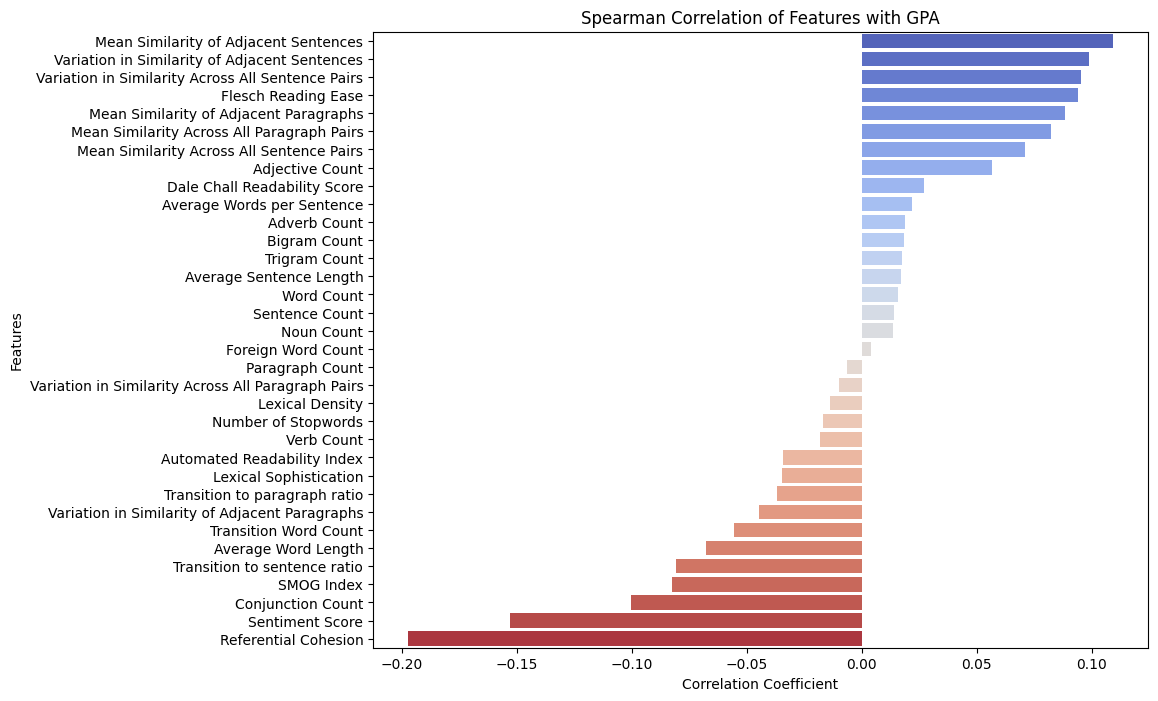

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

result_df.rename(columns={'Transition to paragraph ratio': 'Conjunctive Cohesion'}, inplace=True)

subset_result_df = result_df[feature_columns]
subset_result_df['Weighted Avg'] = weighted_average

spearman_corr = subset_result_df.corr(method='spearman')

spearman_weighted_avg_corr = spearman_corr['Weighted Avg'].drop('Weighted Avg').sort_values(ascending=False)

n_colors = len(spearman_weighted_avg_corr)
colors = sns.color_palette("coolwarm", n_colors)

plt.figure(figsize=(10, 8))
sns.barplot(x=spearman_weighted_avg_corr.values, y=spearman_weighted_avg_corr.index, palette=colors)
plt.title('Spearman Correlation of Features with GPA')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
training_set, testing_set = train_test_split(result_df, test_size=0.2, random_state=42)

X_train = np.vstack(training_set["gpt_embedding"].values)
y_train = training_set["3 Class Labels"].values

X_test = np.vstack(testing_set["gpt_embedding"].values)
y_test = testing_set["3 Class Labels"].values

X_train

array([[ 0.00015193,  0.05059259, -0.01418476, ..., -0.03278109,
         0.00015903, -0.01341645],
       [ 0.00039125,  0.01575785, -0.02006969, ..., -0.03922998,
        -0.00509974,  0.01178311],
       [ 0.01520466,  0.01411182, -0.02266444, ..., -0.0064699 ,
         0.01218748, -0.01455529],
       ...,
       [-0.0162989 ,  0.05155318, -0.01893825, ..., -0.02587942,
        -0.00825656, -0.00393119],
       [ 0.02621014,  0.02600947, -0.01582178, ..., -0.03133485,
        -0.00654482, -0.00230767],
       [ 0.0409182 ,  0.01490119, -0.01984322, ..., -0.01739474,
         0.00137445,  0.00445384]])

In [ ]:
pip install optuna

In [ ]:
pip install optuna-integration[xgboost]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier, DMatrix, train as xgb_train
import optuna
from optuna.integration import XGBoostPruningCallback
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }

    model = XGBClassifier(**param)

    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro')

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

best_params = study.best_trial.params

final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

final_model.fit(X_train, y_train)

joblib.dump(final_model, 'best_model.pkl')

y_test_pred = final_model.predict(X_test)

test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with OpenAI embeddings on Original Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.show()

Test Macro F1 Score: 0.4685689714482284


Text(0, 0.5, 'True Labels')

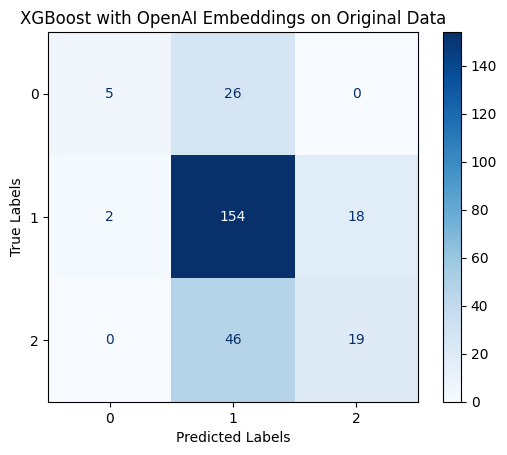

In [ ]:
y_test_pred = final_model.predict(X_test)

test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with OpenAI Embeddings on Original Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


In [ ]:
class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class_0       0.71      0.16      0.26        31
     Class_1       0.68      0.89      0.77       174
     Class_2       0.51      0.29      0.37        65

    accuracy                           0.66       270
   macro avg       0.64      0.45      0.47       270
weighted avg       0.64      0.66      0.62       270



In [ ]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train_embeddings = np.vstack(training_set["gpt_embedding"].values)
X_test_embeddings = np.vstack(testing_set["gpt_embedding"].values)
X_train_additional = training_set[feature_columns].values
X_test_additional = testing_set[feature_columns].values

X_train_combined = np.hstack([X_train_embeddings, X_train_additional])
X_test_combined = np.hstack([X_test_embeddings, X_test_additional])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)



[I 2024-09-07 01:12:01,726] A new study created in memory with name: no-name-9d733d1a-0296-4338-b892-c4533fa30722
[I 2024-09-07 01:12:07,658] Trial 0 finished with value: 0.141680292995119 and parameters: {'eta': 0.06946274034525365, 'n_estimators': 473, 'learning_rate': 0.07649641704620444, 'max_depth': 7, 'min_child_weight': 177, 'subsample': 0.5728109361230675, 'colsample_bytree': 0.8343512170062841, 'gamma': 0.6086032891973087, 'alpha': 0.05617827352215074, 'lambda': 0.015781443868217768}. Best is trial 0 with value: 0.141680292995119.
[I 2024-09-07 01:12:16,661] Trial 1 finished with value: 0.09161908921681798 and parameters: {'eta': 0.01043547705622146, 'n_estimators': 761, 'learning_rate': 0.024188381934806137, 'max_depth': 10, 'min_child_weight': 227, 'subsample': 0.8270295423659784, 'colsample_bytree': 0.655441777766065, 'gamma': 4.070025501081771, 'alpha': 0.03230847962466719, 'lambda': 0.051169589039109516}. Best is trial 0 with value: 0.141680292995119.
[I 2024-09-07 01:12:

Test Macro F1 Score: 0.4131652661064426


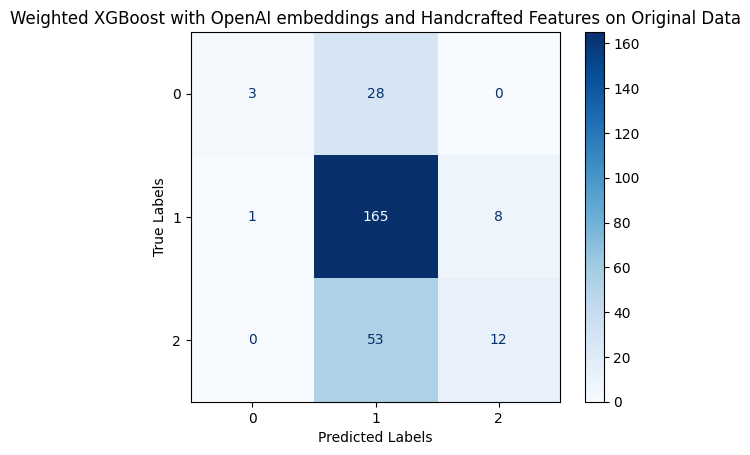

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }

    model = XGBClassifier(**param)

    sample_weights = compute_sample_weight('balanced', y_train)

    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv,
                             scoring='f1_macro', fit_params={'sample_weight': sample_weights})

    return scores.mean()

# Optimize hyperparameters with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

best_params = study.best_trial.params

# Train final model
final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)
final_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(final_model, 'best_model.pkl')

# Predict and evaluate
y_test_pred = final_model.predict(X_test_scaled)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('Weighted XGBoost with OpenAI embeddings and Handcrafted Features on Original Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class_0       0.75      0.10      0.17        31
     Class_1       0.67      0.95      0.79       174
     Class_2       0.60      0.18      0.28        65

    accuracy                           0.67       270
   macro avg       0.67      0.41      0.41       270
weighted avg       0.66      0.67      0.59       270



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)


vectorizer = TfidfVectorizer()

X_train_bow = vectorizer.fit_transform(training_set["string"]).toarray()
X_test_bow = vectorizer.transform(testing_set["string"]).toarray()

y_train = training_set["3 Class Labels"]
y_test = testing_set["3 Class Labels"]



[I 2024-09-07 14:06:41,559] A new study created in memory with name: no-name-82447bf0-1f2d-4c37-94a0-f8ecc67ab312
[I 2024-09-07 14:07:25,405] Trial 0 finished with value: 0.460096524122447 and parameters: {'eta': 0.0259488097655477, 'n_estimators': 641, 'learning_rate': 0.13104757955426288, 'max_depth': 5, 'min_child_weight': 153, 'subsample': 0.8045080279401238, 'colsample_bytree': 0.5568632179768772, 'gamma': 3.9556033844316687, 'alpha': 0.06221872438115158, 'lambda': 0.08650521661181819}. Best is trial 0 with value: 0.460096524122447.
[I 2024-09-07 14:07:52,690] Trial 1 finished with value: 0.4539132622951759 and parameters: {'eta': 0.14925519493801048, 'n_estimators': 212, 'learning_rate': 0.2440644950251313, 'max_depth': 9, 'min_child_weight': 64, 'subsample': 0.7343296806818551, 'colsample_bytree': 0.501017977584747, 'gamma': 0.22806916849076098, 'alpha': 0.031115516296114056, 'lambda': 0.0482515084014713}. Best is trial 0 with value: 0.460096524122447.
[I 2024-09-07 14:08:37,331

Test Macro F1 Score: 0.387821489001692


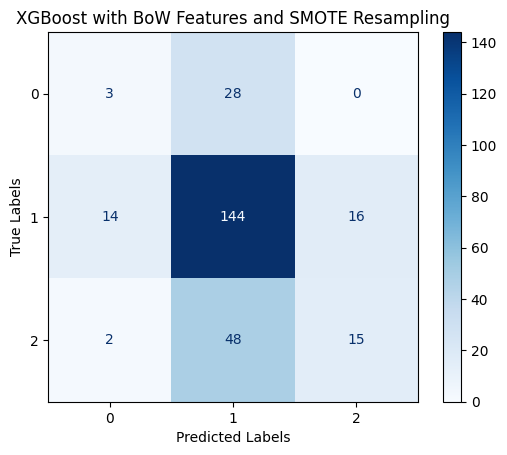

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
import optuna
import joblib
import numpy as np
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': 'cuda',
    }

    model = XGBClassifier(**param)

    # Initialize lists to store scores
    fold_f1_scores = []

    # Perform Stratified K-Fold Cross Validation
    for train_index, test_index in cv.split(X_train_bow, y_train):
        X_train_fold, X_test_fold = X_train_bow[train_index], X_train_bow[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        model.fit(X_train_resampled, y_train_resampled)

        y_pred_fold = model.predict(X_test_fold)

        fold_f1 = f1_score(y_test_fold, y_pred_fold, average='macro')
        fold_f1_scores.append(fold_f1)

    return np.mean(fold_f1_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_trial.params

final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)
final_model.fit(X_train_resampled, y_train_resampled)

joblib.dump(final_model, 'best_model.pkl')

y_test_pred = final_model.predict(X_test_bow)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with BoW Features and SMOTE Resampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test Macro F1 Score: 0.387821489001692


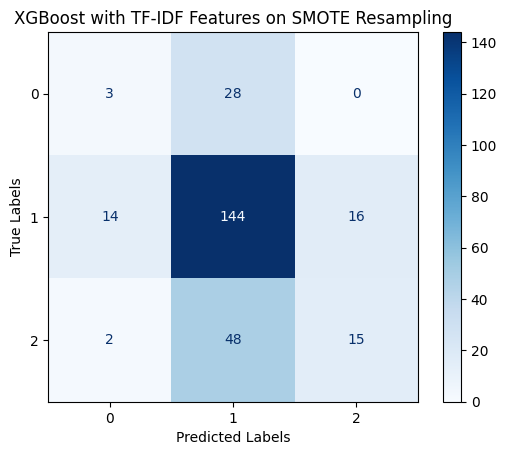

In [ ]:
y_test_pred = final_model.predict(X_test_bow)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with TF-IDF Features on SMOTE Resampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class_0       0.16      0.10      0.12        31
     Class_1       0.65      0.83      0.73       174
     Class_2       0.48      0.23      0.31        65

    accuracy                           0.60       270
   macro avg       0.43      0.39      0.39       270
weighted avg       0.56      0.60      0.56       270



In [ ]:
new_df

NameError: name 'new_df' is not defined